# Stroke EDA and Prediction

Dataset:
https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset/code?datasetId=1120859

## Questions:
     What are the most stroke affected ages ?
     Are males or females more affected by stroke?
     Are smokers more vulnurable to stroke than non-smokers ?
     Which BMI is more safe from stroke?
     What is the prediction performance?
## Steps of the project as follows:
### 1. EDA
     Load Dataset
     Explore Dataset
     Cleaning Dataset
     Analysis and Visualization
### 2. Prediction using Logistic Regression

# 1. Exploratory Data Analysis (EDA)

### Load Data

In [171]:
import numpy as np
import pandas as pd 
import plotly.express as px
import squarify
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [172]:
data=pd.read_csv('stroke-data.csv')
data_shape= data.shape


### Explore Dataset


In [173]:
print(f"data shape: {data_shape}\n")
data.head()

data shape: (5110, 12)



,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [174]:
#Check for null values
data.isnull().sum()


id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

### Cleaning Dataset

In [175]:
# Drop the nulls in the dataset
data = data.dropna()


In [176]:
# let's remove duplicates, if they exist 
data.drop_duplicates(inplace= True)

if data_shape[0] == data.shape[0]:
    print("no duplicates found")
else:
    data.reset_index(drop= True, inplace= True)
    print(f"there are {data_shape[0] - data.shape[0]} duplicates")

there are 201 duplicates


In [177]:
#Storing Copy of the cleaned data in different memory location
data1=data.copy()


In [178]:
# Checking unique values in each categorical column

cats = ['gender', 'hypertension', 'heart_disease', 'ever_married',
        'work_type', 'Residence_type', 'smoking_status', 'stroke']

for col in cats:
    x = data1[col].unique()
    print(col + ':', np.sort(x, axis=None), '\n')

gender: ['Female' 'Male' 'Other'] 

hypertension: [0 1] 

heart_disease: [0 1] 

ever_married: ['No' 'Yes'] 

work_type: ['Govt_job' 'Never_worked' 'Private' 'Self-employed' 'children'] 

Residence_type: ['Rural' 'Urban'] 

smoking_status: ['Unknown' 'formerly smoked' 'never smoked' 'smokes'] 

stroke: [0 1] 



In [179]:
# convert them into Categorical dtype
for cat in cats:
    data1[cat] = pd.Categorical(data1[cat])

data1.dtypes


id                      int64
gender               category
age                   float64
hypertension         category
heart_disease        category
ever_married         category
work_type            category
Residence_type       category
avg_glucose_level     float64
bmi                   float64
smoking_status       category
stroke               category
dtype: object

### Analysis and Visualization

In [180]:
# making age groups
bins= [0, 20, 40, 60, 80, 200]
labels= ["1-20", "21-40", "41-60", "61-80", "80+"]
data1["age_group"] = pd.cut(data1["age"], bins= bins, labels= labels, ordered= True)
# making bmi groups
bins= [0, 18.5, 24.9, 29.9, 34.9, 100]
labels= ["Underweight", "Normal", "Overweight", "Obese", "Extremely Obese"]
data1["bmi_group"] = pd.cut(data1["bmi"], bins= bins, labels= labels, ordered= True)


In [181]:
# auxiliary functions
def calculate_proportions_by_group(data1, group_col, value_col):
  """ 
  Calculates the proportions of the specified value within each group.

  Args:
    data: A pandas DataFrame containing the data.
    group_col: The name of the column specifying the groups.
    value_col: The name of the column containing the values.

  Returns:
    A pandas Series containing the proportions of the values within each group.
  """

  proportions= data1.groupby(group_col, observed= False)[value_col].value_counts(normalize= True)
  proportions= proportions.mul(100)
  proportions= proportions.rename("percentage")

  return proportions


def calculate_proportions_as_a_whole(data1, target_var, group_var, title):
  """
  Creates a heatmap visualizing the proportions of a target variable within groups.

  Args:
      data: The DataFrame containing the data.
      target_var: The name of the target variable.
      group_var: The name of the variable used for grouping.
      title: The title for the heatmap.
  """

  # Create the crosstab with normalization
  crosstab= pd.crosstab(index= data1[target_var], columns= data[group_var], normalize= True)

  # Round the proportions to a specific number of decimal places
  rounded_crosstab= crosstab.round(3)

  # Create the heatmap
  sns.heatmap(rounded_crosstab, annot= True)
  plt.title(title)
  plt.show()


In [182]:
proportions = calculate_proportions_by_group(data1, "age_group", "stroke")
print(proportions)

age_group  stroke
1-20       0         99.900000
           1          0.100000
21-40      0         99.577703
           1          0.422297
41-60      0         96.220159
           1          3.779841
61-80      0         88.838475
           1         11.161525
80+        0         80.000000
           1         20.000000
Name: percentage, dtype: float64


- As Age increseas Vulnurability to stroke increases. 

In [183]:
proportions = calculate_proportions_by_group(data1, "age_group", "gender")
print(proportions)

age_group  gender
1-20       Female    50.500000
           Male      49.500000
           Other      0.000000
21-40      Female    66.469595
           Male      33.445946
           Other      0.084459
41-60      Female    59.084881
           Male      40.915119
           Other      0.000000
61-80      Female    58.439201
           Male      41.560799
           Other      0.000000
80+        Female    60.869565
           Male      39.130435
           Other      0.000000
Name: percentage, dtype: float64


- This indicates Females are more vulnerable to stroke than males

In [184]:
proportions = calculate_proportions_by_group(data, "smoking_status", "stroke")
print(proportions)

smoking_status   stroke
Unknown          0         98.044504
                 1          1.955496
formerly smoked  0         93.189964
                 1          6.810036
never smoked     0         95.464363
                 1          4.535637
smokes           0         94.708277
                 1          5.291723
Name: percentage, dtype: float64


- Smoking have no observable side effect on stroke. 

In [185]:
# counting number of stroke cases in each group
df= data1[data1['stroke'] == 1]
BMIGroupsByStroke= df.groupby(by= "bmi_group", observed= False)["stroke"].count().sort_values()

BMIGroupsByStroke= BMIGroupsByStroke.rename("count")
BMIGroupsByStroke

bmi_group
Underweight         1
Normal             35
Extremely Obese    42
Obese              56
Overweight         75
Name: count, dtype: int64

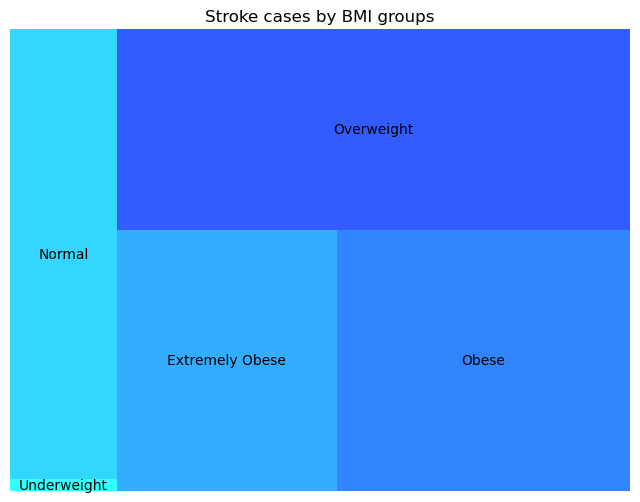

In [186]:
colors = ["#00FFFF", "#00CCFF", "#0099FF", "#0066FF", "#0033FF"]

plt.figure(figsize=(8, 6))
squarify.plot(sizes= BMIGroupsByStroke, label= BMIGroupsByStroke.index, alpha=.8, color=colors)
plt.axis('off')
plt.title("Stroke cases by BMI groups")
plt.show()

- Therefore Underweight is the least vulnurable bmi group for stroke

# 2. Prediction

In [187]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Convert categorical variables to numeric
data = pd.get_dummies(data, drop_first=True)

# Split features and target
X = data.drop('stroke', axis=1)
y = data['stroke']

# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.25, shuffle=True, stratify=y)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train Logistic Regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, Y_train)

# Model evaluation
train_score = logistic_model.score(X_train, Y_train)
test_score = logistic_model.score(X_test, Y_test)
y_pred = logistic_model.predict(X_test)

# Metrics
precision = precision_score(Y_test, y_pred, average='weighted')
recall = recall_score(Y_test, y_pred, average='weighted')
f1 = f1_score(Y_test, y_pred, average='weighted')
accuracy = accuracy_score(Y_test, y_pred)

# Display results
results = {
    'Train Score': train_score,
    'Test Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
}

print("Logistic Regression Model Performance:")
for metric, value in results.items():
    print(f"{metric}: {value:.4f}")

Logistic Regression Model Performance:
Train Score: 0.9576
Test Accuracy: 0.9577
Precision: 0.9171
Recall: 0.9577
F1 Score: 0.9369
